In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopy
import utm

In [7]:
%matplotlib inline

In [8]:
tri_df = pd.read_csv('Resources/tri_df.csv')

In [9]:
tri_df.head()

,Unnamed: 0,Latitude,Longitude,Company,Facility,Facility ID,Address,City,County,State,Zip
0,1,45.0205,-92.4631,ANDERSEN CORP,ANDERSEN CORP,55003NDRSNFOOTO,100 4TH AVE N,BAYPORT,WASHINGTON,MN,55003
1,2,45.0149,-92.4643,XCEL ENERGY,XCEL ENERGY A S KING GENERATING PLANT,55003SKNGG1103K,1103 KING RD,BAYPORT,WASHINGTON,MN,55003
2,3,45.3407,-93.1309,WATER WORKS MANUFACTURING,CAMBRIDGE METALS and PLASTICS,55008CMBRD500SC,500 S CLEVELAND,CAMBRIDGE,ISANTI,MN,55008
3,4,45.3345,-93.1312,NaN,CANADIAN HARVEST USA,55008CNDNH1001S,1001 S CLEVELAND ST,CAMBRIDGE,ISANTI,MN,55008
4,6,45.3451,-93.1255,NaN,ARROW TANK and ENGINEERING CO,55008RRWTN650NO,650 N EMERSON,CAMBRIDGE,ISANTI,MN,55008


In [10]:
tri_df.describe(include='all')

,Unnamed: 0,Latitude,Longitude,Company,Facility,Facility ID,Address,City,County,State,Zip
count,1015.000000,1015.000000,1015.000000,296,1015,1015,1015,1015,1015,1015,1.015000e+03
unique,NaN,NaN,NaN,217,947,1015,1007,237,77,1,NaN
top,NaN,NaN,NaN,HORMEL FOODS CORP,ASSOCIATED MILK PRODUCERS INC,56379WMNCR180IN,12130 LYNN AVE S,MINNEAPOLIS,HENNEPIN,MN,NaN
freq,NaN,NaN,NaN,6,4,1,2,101,246,1015,NaN
mean,626.552709,44.834081,-93.286600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.869245e+07
std,355.571769,0.909220,3.612186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.569648e+08
min,1.000000,40.031200,-99.205000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500300e+04
25%,321.500000,44.463650,-93.572250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.531700e+04
50%,625.000000,44.582000,-93.204500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.542800e+04
75%,922.500000,45.072650,-93.096200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.615750e+04


In [11]:
file = 'boundaries/bdry_school_attendance_areas.gdb'
shp_df = gpd.read_file(file)

In [12]:
tri_length = len(tri_df['Latitude'])
tri_length

1015

In [13]:
lat = tri_df['Latitude'][1]
lng = tri_df['Longitude'][1]
print(lat, lng)

45.0149 -92.4643


In [14]:
utm.from_latlon(lat, lng)

(542210.4105705898, 4984745.174006095, 15, 'T')

In [15]:
utm_save = []

for lat_lng in tri_df.index:
    lat = tri_df['Latitude'][lat_lng]
    lng = tri_df['Longitude'][lat_lng]
    print(lat, lng)
    current = utm.from_latlon(lat, lng)
    print(current)
    utm_save.append(current)


45.0205 -92.4631
(542300.8410042864, 4985367.890990298, 15, 'T')
45.0149 -92.4643
(542210.4105705898, 4984745.174006095, 15, 'T')
45.3407 -93.1309
(489744.4029225176, 5020807.318728867, 15, 'T')
45.3345 -93.1312
(489719.77706151444, 5020118.574684268, 15, 'T')
45.3451 -93.1255
(490168.237286967, 5021295.459080696, 15, 'T')
45.3416 -93.1258
(490144.1277850209, 5020906.666641817, 15, 'T')
44.31100000000001 -92.5411
(536599.1819000769, 4906518.255888615, 15, 'T')
44.3106 -92.5413
(536583.4795366834, 4906473.737079866, 15, 'T')
44.3114 -92.5418
(536543.1057531877, 4906562.373352268, 15, 'T')
44.3108 -92.5403
(536663.1097689831, 4906496.39839104, 15, 'T')
44.4736 -92.54
(536585.4706615556, 4924579.629778071, 15, 'T')
44.4719 -92.5415
(536467.2288090208, 4924390.128770629, 15, 'T')
44.174 -93.155
(487609.3876468608, 4891210.612127488, 15, 'T')
44.1736 -93.1736
(486122.42022870097, 4891169.154785122, 15, 'T')
44.1728 -93.1602
(487193.4428666309, 4891078.123461613, 15, 'T')
44.1929 -93.175
(48

In [19]:
utm_save

[(542300.8410042864, 4985367.890990298, 15, 'T'),
 (542210.4105705898, 4984745.174006095, 15, 'T'),
 (489744.4029225176, 5020807.318728867, 15, 'T'),
 (489719.77706151444, 5020118.574684268, 15, 'T'),
 (490168.237286967, 5021295.459080696, 15, 'T'),
 (490144.1277850209, 5020906.666641817, 15, 'T'),
 (536599.1819000769, 4906518.255888615, 15, 'T'),
 (536583.4795366834, 4906473.737079866, 15, 'T'),
 (536543.1057531877, 4906562.373352268, 15, 'T'),
 (536663.1097689831, 4906496.39839104, 15, 'T'),
 (536585.4706615556, 4924579.629778071, 15, 'T'),
 (536467.2288090208, 4924390.128770629, 15, 'T'),
 (487609.3876468608, 4891210.612127488, 15, 'T'),
 (486122.42022870097, 4891169.154785122, 15, 'T'),
 (487193.4428666309, 4891078.123461613, 15, 'T'),
 (486015.0675764502, 4893313.069853482, 15, 'T'),
 (487057.7836340483, 4891200.567959263, 15, 'T'),
 (485375.7810456631, 4893325.569284729, 15, 'T'),
 (487020.44669914217, 4892533.502650589, 15, 'T'),
 (491835.22964425007, 4914440.562313127, 15, 'T')

In [16]:
tri_df['utm'] = utm_save

In [17]:
tri_df.head()

,Unnamed: 0,Latitude,Longitude,Company,Facility,Facility ID,Address,City,County,State,Zip,utm
0,1,45.0205,-92.4631,ANDERSEN CORP,ANDERSEN CORP,55003NDRSNFOOTO,100 4TH AVE N,BAYPORT,WASHINGTON,MN,55003,"(542300.8410042864, 4985367.890990298, 15, T)"
1,2,45.0149,-92.4643,XCEL ENERGY,XCEL ENERGY A S KING GENERATING PLANT,55003SKNGG1103K,1103 KING RD,BAYPORT,WASHINGTON,MN,55003,"(542210.4105705898, 4984745.174006095, 15, T)"
2,3,45.3407,-93.1309,WATER WORKS MANUFACTURING,CAMBRIDGE METALS and PLASTICS,55008CMBRD500SC,500 S CLEVELAND,CAMBRIDGE,ISANTI,MN,55008,"(489744.4029225176, 5020807.318728867, 15, T)"
3,4,45.3345,-93.1312,NaN,CANADIAN HARVEST USA,55008CNDNH1001S,1001 S CLEVELAND ST,CAMBRIDGE,ISANTI,MN,55008,"(489719.77706151444, 5020118.574684268, 15, T)"
4,6,45.3451,-93.1255,NaN,ARROW TANK and ENGINEERING CO,55008RRWTN650NO,650 N EMERSON,CAMBRIDGE,ISANTI,MN,55008,"(490168.237286967, 5021295.459080696, 15, T)"


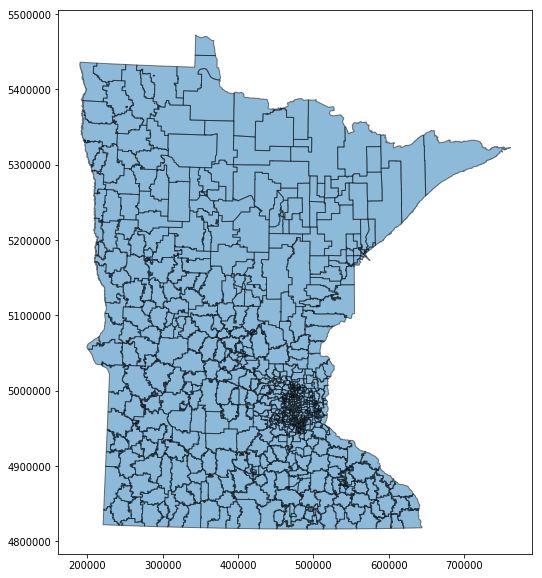

In [18]:
ax = shp_df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [20]:
tri_gdf = gpd.GeoDataFrame(tri_df, geometry=tri_df['utm'])
#Passing lan and lon to points
#bank_points = df_banks[['lon', 'lat']].apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
#geo_banks = gp.GeoDataFrame({"geometry": bank_points, "bank_names": df_banks["bank_names"]})

#You need to establish a coordinate system for the data you scraped.
#geo_banks.crs = {'init': 'epsg:4326'}

TypeError: Input geometry column must contain valid geometry objects.

In [8]:
TRI_points = tri_df[['Longitude', 'Latitude']].apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
TRI_geo = gpd.GeoDataFrame({"geometry": TRI_points, "geo_names": tri_df['Facility']})

In [9]:
TRI_geo.crs = {'init': 'epsg:26915'}

In [10]:
TRI_geo.head()

,geometry,geo_names
0,POINT (-92.4631 45.0205),ANDERSEN CORP
1,POINT (-92.46429999999999 45.0149),XCEL ENERGY A S KING GENERATING PLANT
2,POINT (-93.1309 45.3407),CAMBRIDGE METALS and PLASTICS
3,POINT (-93.13120000000001 45.3345),CANADIAN HARVEST USA
4,POINT (-93.1255 45.3451),ARROW TANK and ENGINEERING CO


In [37]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))


AttributeError: module 'geopandas' has no attribute 'points_from_xy'

In [16]:
shp_df.head()

,Shape_Length,Shape_Area,UNI_TYP,UNI_MAJ,UNI_NAM,ELEM_NAME,MIDD_NAME,HIGH_NAME,geometry
0,26178.487805,1.954316e+07,01,0000,Minneapolis-Saint Paul Intl Airport,,,,(POLYGON ((485953.9400000004 4970757.689999999...
1,274684.806259,2.129586e+09,01,0001,Aitkin,RIPPLESIDE,,AITKIN,"(POLYGON ((470301 5190700, 470698.9540999997 5..."
2,8763.507360,3.653680e+06,03,0001,Minneapolis,ANDERSEN,ANDERSEN & SANFORD,SOUTH,"(POLYGON ((480088.0308999997 4978042.0956, 480..."
3,13747.352019,7.073742e+06,03,0001,Minneapolis,ANNE SULLIVAN,ANNE SULLIVAN & SANFORD,SOUTH,(POLYGON ((480883.4464999996 4980570.381899999...
4,10637.296909,5.191875e+06,03,0001,Minneapolis,BETHUNE,FRANKLIN,NORTH,(POLYGON ((478292.0543999998 4982879.209000001...
